In [5]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt


# Exercise 4: Introducing uncertainty

Consider the model with uncertainty:
$$\begin{align*}
    V_{t}(W_{t}) & = \max_{c_{t}}\left\{ \sqrt{c_{t}} + \beta \sum_{i=1}^K V_{t+1}(W_t-c_t+\varepsilon_i)\pi_i  \right\} \\
 & \text{s.t.}\\
c_{t} & \leq  W_{t} , \,\forall t\\
c_{t} & \in  \mathbb{R}_+, \,\forall t \\
\varepsilon_i & \in \mathbb{N}  \text{ with probability } \pi_i\ge 0, i=1,\dots,K, \text{ and } \sum_{i=1}^K \pi_i=1
\end{align*}$$
for $T=10$, $\beta=0.90$ and $W_{1}=10$. Further assume that $\epsilon_i$ follows a uniform distribution, $K=5$ and $\epsilon_{i} \in (0,1,2,3,4)$

### 1. Solve the model using *backward induction*, *grid search*, and *linear interpolation*.

In [6]:
# Setup specifications in class. 
class par: pass
par.beta = 0.90
par.W = 10
par.T = 10
par.K = 5
par.eps = [0, 1, 2, 3, 4] 
par.pi = [0.2,0.2,0.2,0.2,0.2]

# Grid
par.num_W = 200
par.num_C = 200

In [7]:
# load modules related to this exercise
import Exercise_4 as ex4

# Solve the model
sol = ex4.solve_consumption_uncertainty(par)

### 2. Plot the value function and the consumption function for $t=1$. Make sure that both functions are increasing in $W$.

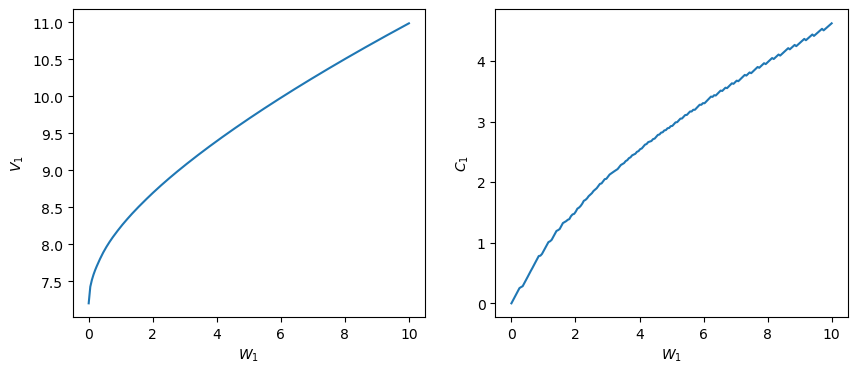

In [8]:
# Compare 
fig = plt.figure(figsize=(10,4)) # figsize is in inches...

ax = fig.add_subplot(1,2,1)
ax.plot(sol.grid_W[:,0],sol.V[:,0])
ax.set_xlabel("$W_1$")
ax.set_ylabel("$V_1$")
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(sol.grid_W[:,0],sol.C[:,0])
ax_right.set_xlabel("$W_1$")
ax_right.set_ylabel("$C_1$")
plt.show()

### 3. Compare the value function and consumption function from ex. 1 with a deterministic model.
Compare with a model with no income growth, and with a model with a deterministic income growth of 2 in each period (as this is the average stochastic income growth).

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_53203/4112853218.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(sol.grid_W[:,0],sol.C[:,0], label='Uniform distribution, $\epsilon$',)
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_53203/4112853218.py:7: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(sol_fixed.grid_W[:,0],sol_fixed.C[:,0], label='Deterministic, $\epsilon$')
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_53203/4112853218.py:11: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(sol.grid_W[:,0],sol.V[:,0], label='Uni

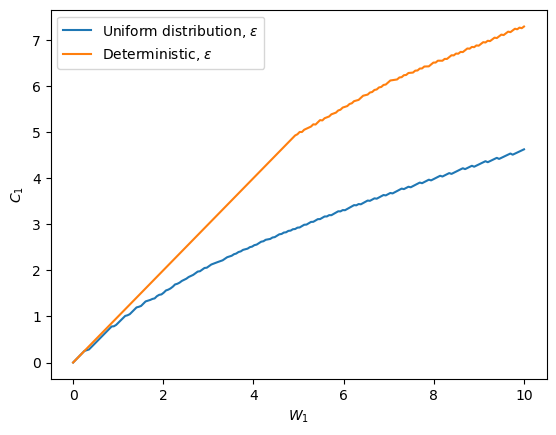

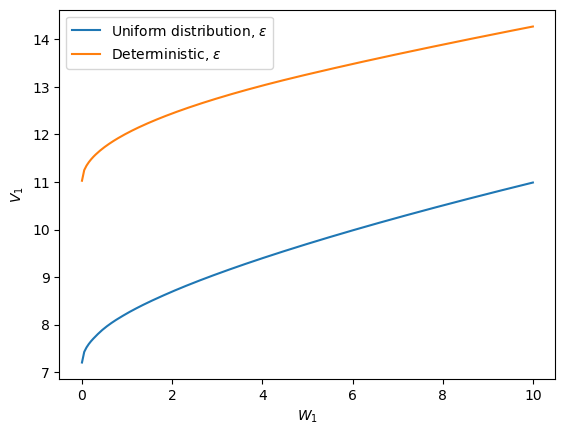

In [10]:
class par_fixed(par): pass  # Create a copy of the class
par_fixed.pi = [0,0,0,0,1] # Set the deterministic distribution
sol_fixed = ex4.solve_consumption_uncertainty(par_fixed)

# Compare 
plt.plot(sol.grid_W[:,0],sol.C[:,0], label='Uniform distribution, $\epsilon$',)
plt.plot(sol_fixed.grid_W[:,0],sol_fixed.C[:,0], label='Deterministic, $\epsilon$')
plt.ylabel('$C_1$')
plt.xlabel('$W_1$')
plt.legend();plt.show()
plt.plot(sol.grid_W[:,0],sol.V[:,0], label='Uniform distribution, $\epsilon$')
plt.plot(sol_fixed.grid_W[:,0],sol_fixed.V[:,0], label='Deterministic, $\epsilon$')
plt.ylabel('$V_1$')
plt.xlabel('$W_1$')
plt.legend();plt.show()

### 4. Reestimate the model assuming that $\pi = [0.05, 0.05, 0.8, 0.05, 0.05]$. How does the solution compare to the model with uniform uncertainty? 

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\e'
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_53203/4176403197.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(sol.grid_W[:,0],sol.C[:,0], label='Uniform distribution, $\epsilon$')
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_53203/4176403197.py:7: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(sol_mass.grid_W[:,0],sol_mass.C[:,0], label='Mass point distribution, $\epsilon$')
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_53203/4176403197.py:9: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(sol.grid_W[:,0],sol.V[:,0], label=

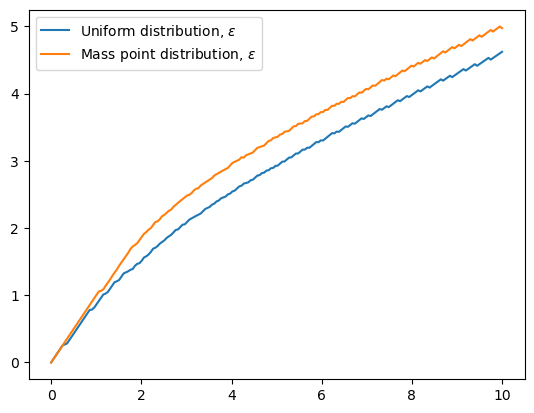

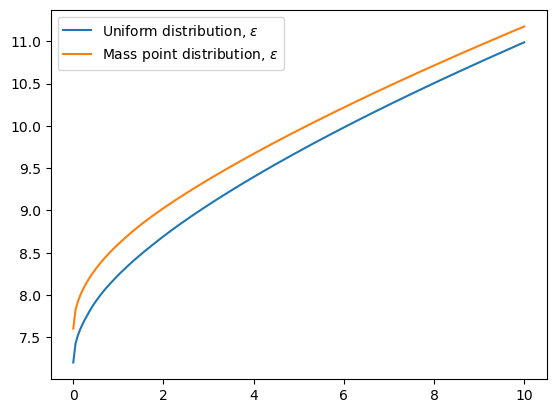

In [11]:
class par_mass(par): pass 
par_mass.pi = [0.05, 0.05, 0.8, 0.05, 0.05]
sol_mass = ex4.solve_consumption_uncertainty(par_mass)

# Compare 
plt.plot(sol.grid_W[:,0],sol.C[:,0], label='Uniform distribution, $\epsilon$')
plt.plot(sol_mass.grid_W[:,0],sol_mass.C[:,0], label='Mass point distribution, $\epsilon$')
plt.legend();plt.show()
plt.plot(sol.grid_W[:,0],sol.V[:,0], label='Uniform distribution, $\epsilon$')
plt.plot(sol_mass.grid_W[:,0],sol_mass.V[:,0], label='Mass point distribution, $\epsilon$')
plt.legend();plt.show()

### 5. Simulate a panel of *10,000* household for *10* periods and plot the mean of $C_t$. 
Everybody should be initialized with $W_1 = 10$. Simulate using the solution from ex.1 and the solution from ex. 4. What is the intuition of the graphs?

<>:31: SyntaxWarning: invalid escape sequence '\e'
<>:32: SyntaxWarning: invalid escape sequence '\e'
<>:31: SyntaxWarning: invalid escape sequence '\e'
<>:32: SyntaxWarning: invalid escape sequence '\e'
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_53203/3934435003.py:31: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(sim.T_grid,sim_uni, label='Uniform distribution, $\epsilon$')
/var/folders/dm/v2ztg7hn3_z54xvh868kqz300000gn/T/ipykernel_53203/3934435003.py:32: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(sim.T_grid,sim_mass, label='Mass point distribution, $\epsilon$')


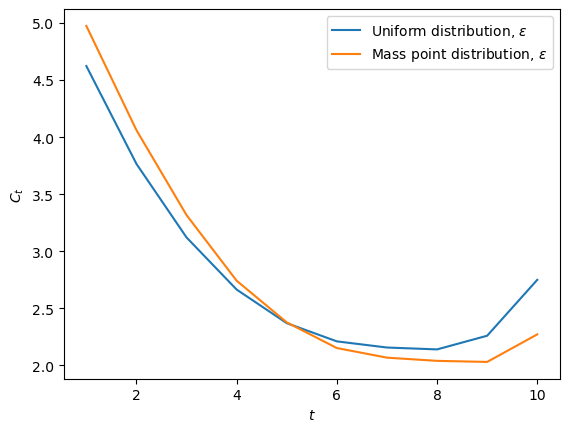

In [ ]:
# Simulate 
np.random.seed(2022)  #Seed value, it ensures that the computer draw the same "random"-numbers each time

def simulate(sol, par, sim):
    
    # Allocate
    shape = (sim.simN, sim.T)
    simN = sim.simN
    W_ini = sim.W_ini
    W = sim.W_ini*np.ones(shape)
    C = np.nan +np.zeros(shape)
    mean = np.zeros(sim.T)
    
    for t in range(par.T):
        C[:,t] =np.interp(W[:,t],sol.grid_W[:,t],sol.C[:,t])   # Interpolates the optimal consumption
        eps =np.random.choice(par.eps, size = simN, p= par.pi) # Draw epsilon
        mean[t] = np.mean(C[:,t])                              # Calculate the mean of consumption
        if t<par.T-1:                                          # Update the wealth
            W[:,t+1] = W[:,t]-C[:,t]+eps                       
    return mean

class sim: pass
sim.simN = 10000                 # Number of simulations
sim.W_ini = 10                   # Initial wealth
sim.T = 10                       # Number of periods
sim.T_grid = range(1,sim.T+1)    # Grid for time

sim_uni = simulate(sol,par,sim)
sim_mass = simulate(sol_mass,par_mass,sim)

plt.plot(sim.T_grid,sim_uni, label='Uniform distribution, $\epsilon$')
plt.plot(sim.T_grid,sim_mass, label='Mass point distribution, $\epsilon$')
plt.ylabel('$C_t$')
plt.xlabel('$t$')
plt.legend();plt.show()